In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nqs.state.utils import plot_style

# Paths to data
DATA_PATH = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_polarized/final_results_v0_{v_0}.csv"
data_hf_path = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_polarized/data_hf.csv"
data_ci_path = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_polarized/data_ci.csv"

# Combine v_0 =-20, -10, 0, 10, 20 into one dataframe
v_0s = [ 0]
dfs = []
for v_0 in v_0s:
    df = pd.read_csv(DATA_PATH.format(v_0=v_0))
    df["v_0"] = v_0
    dfs.append(df)

# Preprocess data
dfs = [df.dropna(subset=["time_train"]) for df in dfs]
dfs = [df[df["nsamples"] == 1048576] for df in dfs]
dfs = [df.drop(columns=[col for col in df.columns if "time" not in col and "nqs_type" not in col and "n_particles" not in col and "Opti" not in col]) for df in dfs]
dfs = [df.sort_values(by="n_particles") for df in dfs]
dfs = [df[df["n_particles"] != 3] for df in dfs]
print(dfs)
# Combine all dataframes into one
combined_df = pd.concat(dfs)

# Filter the data by nqs_type
df_vmc = combined_df[combined_df["nqs_type"] == "vmc"]
df_rbm = combined_df[combined_df["nqs_type"] == "rbm"]
df_dsffn = combined_df[combined_df["nqs_type"] == "dsffn"]




[    nqs_type  n_particles  Opti  time_train  time_sample
20       vmc            2  adam   13.621579    14.718455
76       rbm            2  adam   14.621821    16.625583
62       rbm            2  adam   13.151212    17.076038
83       rbm            2    sr   13.455951    17.679167
90       rbm            2    sr   13.614650    16.655694
..       ...          ...   ...         ...          ...
111    dsffn           14  adam  155.041366   348.756818
40       vmc           14  adam  130.891888   246.829232
33       vmc           14  adam  128.198911   229.025107
89       rbm           14    sr  357.960454   211.664175
150    dsffn           14    sr  389.570642   305.153510

[131 rows x 5 columns]]


In [3]:
df_dsffn

,nqs_type,n_particles,Opti,time_train,time_sample
105,dsffn,2,adam,15.861195,24.022044
109,dsffn,2,adam,14.645013,16.584656
112,dsffn,2,adam,14.533867,21.940195
114,dsffn,2,adam,14.831033,16.038967
115,dsffn,2,sr,29.649717,14.569624
116,dsffn,2,sr,30.375500,16.151134
117,dsffn,2,sr,29.471457,14.571556
113,dsffn,2,adam,14.658756,18.308171
119,dsffn,4,adam,18.746034,19.751427
107,dsffn,4,adam,17.334829,21.204548


/var/folders/2s/d8fpjk816ql0n2mnpb562zw00000gn/T/ipykernel_32270/416753466.py:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data=df_vmc, x="n_particles", y="time_train", hue="Opti", ax=axs[0], palette=palette)
/var/folders/2s/d8fpjk816ql0n2mnpb562zw00000gn/T/ipykernel_32270/416753466.py:25: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data=df_rbm, x="n_particles", y="time_train", hue="Opti", ax=axs[1], palette=palette)
/var/folders/2s/d8fpjk816ql0n2mnpb562zw00000gn/T/ipykernel_32270/416753466.py:49: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data=df_dsffn, x="n_particles", y="time_train", hue="Opti", ax=axs[2], palette=palette)


Saving figure to /Users/orpheus/Documents/Masters/NeuralQuantumState/analysis/figs/time_scaling_1d.pdf


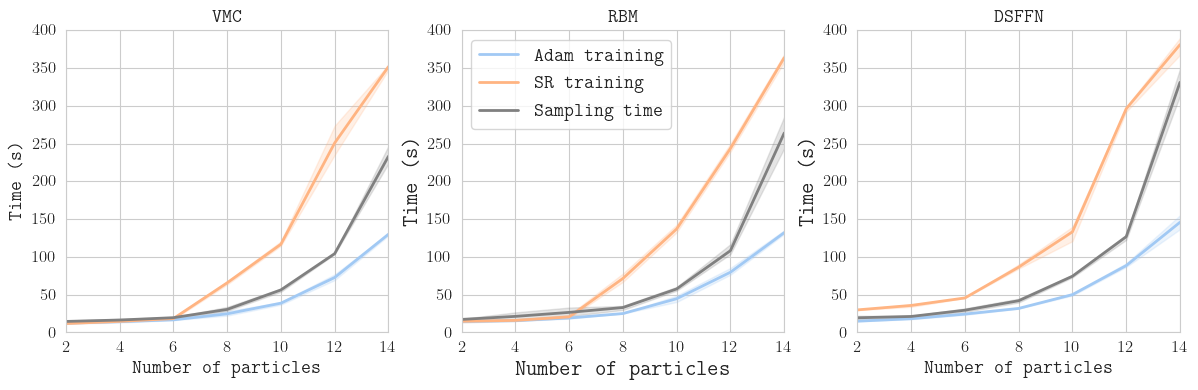

In [5]:
# Define a color palette to ensure consistency across plots
palette = sns.color_palette("pastel")

# Plotting the time data
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# VMC plot
sns.lineplot(data=df_vmc, x="n_particles", y="time_train", hue="Opti", ax=axs[0], palette=palette)
ada_time_sample_vmc = df_vmc[df_vmc["Opti"] == "adam"]
sns.lineplot(data=ada_time_sample_vmc, x="n_particles", y="time_sample", color="gray", ax=axs[0])

# Remove legend from VMC plot
axs[0].get_legend().remove()
axs[0].set_ylabel("Time (s)", fontsize=14)
axs[0].set_xlabel("Number of particles", fontsize=14)
axs[0].set_title("VMC", fontsize=14)
# set xlimit 
axs[0].set_xlim(2, 14)
axs[0].set_ylim(0, 400)




# RBM plot
sns.lineplot(data=df_rbm, x="n_particles", y="time_train", hue="Opti", ax=axs[1], palette=palette)
ada_time_sample_rbm = df_rbm[df_rbm["Opti"] == "adam"]
sns.lineplot(data=ada_time_sample_rbm, x="n_particles", y="time_sample", color="gray", ax=axs[1])

# Customize the legend
handles, labels = axs[1].get_legend_handles_labels()
new_labels = []
for label in labels:
    if label == 'adam':
        new_labels.append('Adam training')
    elif label == 'sr':
        new_labels.append('SR training')
    else:
        new_labels.append(label)
new_labels.append('Sampling time')
handles.append(plt.Line2D([], [], color="gray"))

axs[1].legend(handles, new_labels, loc="upper left")
axs[1].set_ylabel("Time (s)")
axs[1].set_xlabel("Number of particles")
axs[1].set_title("RBM", fontsize=14)
axs[1].set_xlim(2, 14)
axs[1].set_ylim(0, 400)
# DSFFN plot
sns.lineplot(data=df_dsffn, x="n_particles", y="time_train", hue="Opti", ax=axs[2], palette=palette)
ada_time_sample_dsffn = df_dsffn[df_dsffn["Opti"] == "adam"]
sns.lineplot(data=ada_time_sample_dsffn, x="n_particles", y="time_sample", color="gray", ax=axs[2])

# Remove legend from DSFFN plot
axs[2].get_legend().remove()
axs[2].set_ylabel("Time (s)")
axs[2].set_xlabel("Number of particles", fontsize=14)
axs[2].set_title("DSFFN", fontsize=14)
axs[2].set_xlim(2, 14)
axs[2].set_ylim(0, 400)

plt.tight_layout()

plot_style.save("time_scaling_1d")

plt.show()

[    nqs_type  n_particles  Opti  time_train  time_sample
20       vmc            2  adam   13.621579    14.718455
76       rbm            2  adam   14.621821    16.625583
62       rbm            2  adam   13.151212    17.076038
83       rbm            2    sr   13.455951    17.679167
90       rbm            2    sr   13.614650    16.655694
..       ...          ...   ...         ...          ...
111    dsffn           14  adam  155.041366   348.756818
40       vmc           14  adam  130.891888   246.829232
33       vmc           14  adam  128.198911   229.025107
89       rbm           14    sr  357.960454   211.664175
150    dsffn           14    sr  389.570642   305.153510

[131 rows x 5 columns]]
vmc
adam poly fit: a=0.5, b=2.05
adam exp fit: a=0.5, b=0.40
adam poly fit R²: 0.91
adam exp fit R²: 0.92
sr poly fit: a=0.5, b=2.48
sr exp fit: a=0.5, b=0.48
sr poly fit R²: 0.97
sr exp fit R²: 0.84
rbm
adam poly fit: a=0.5, b=2.07
adam exp fit: a=0.5, b=0.40
adam poly fit R²: 0.93
adam e

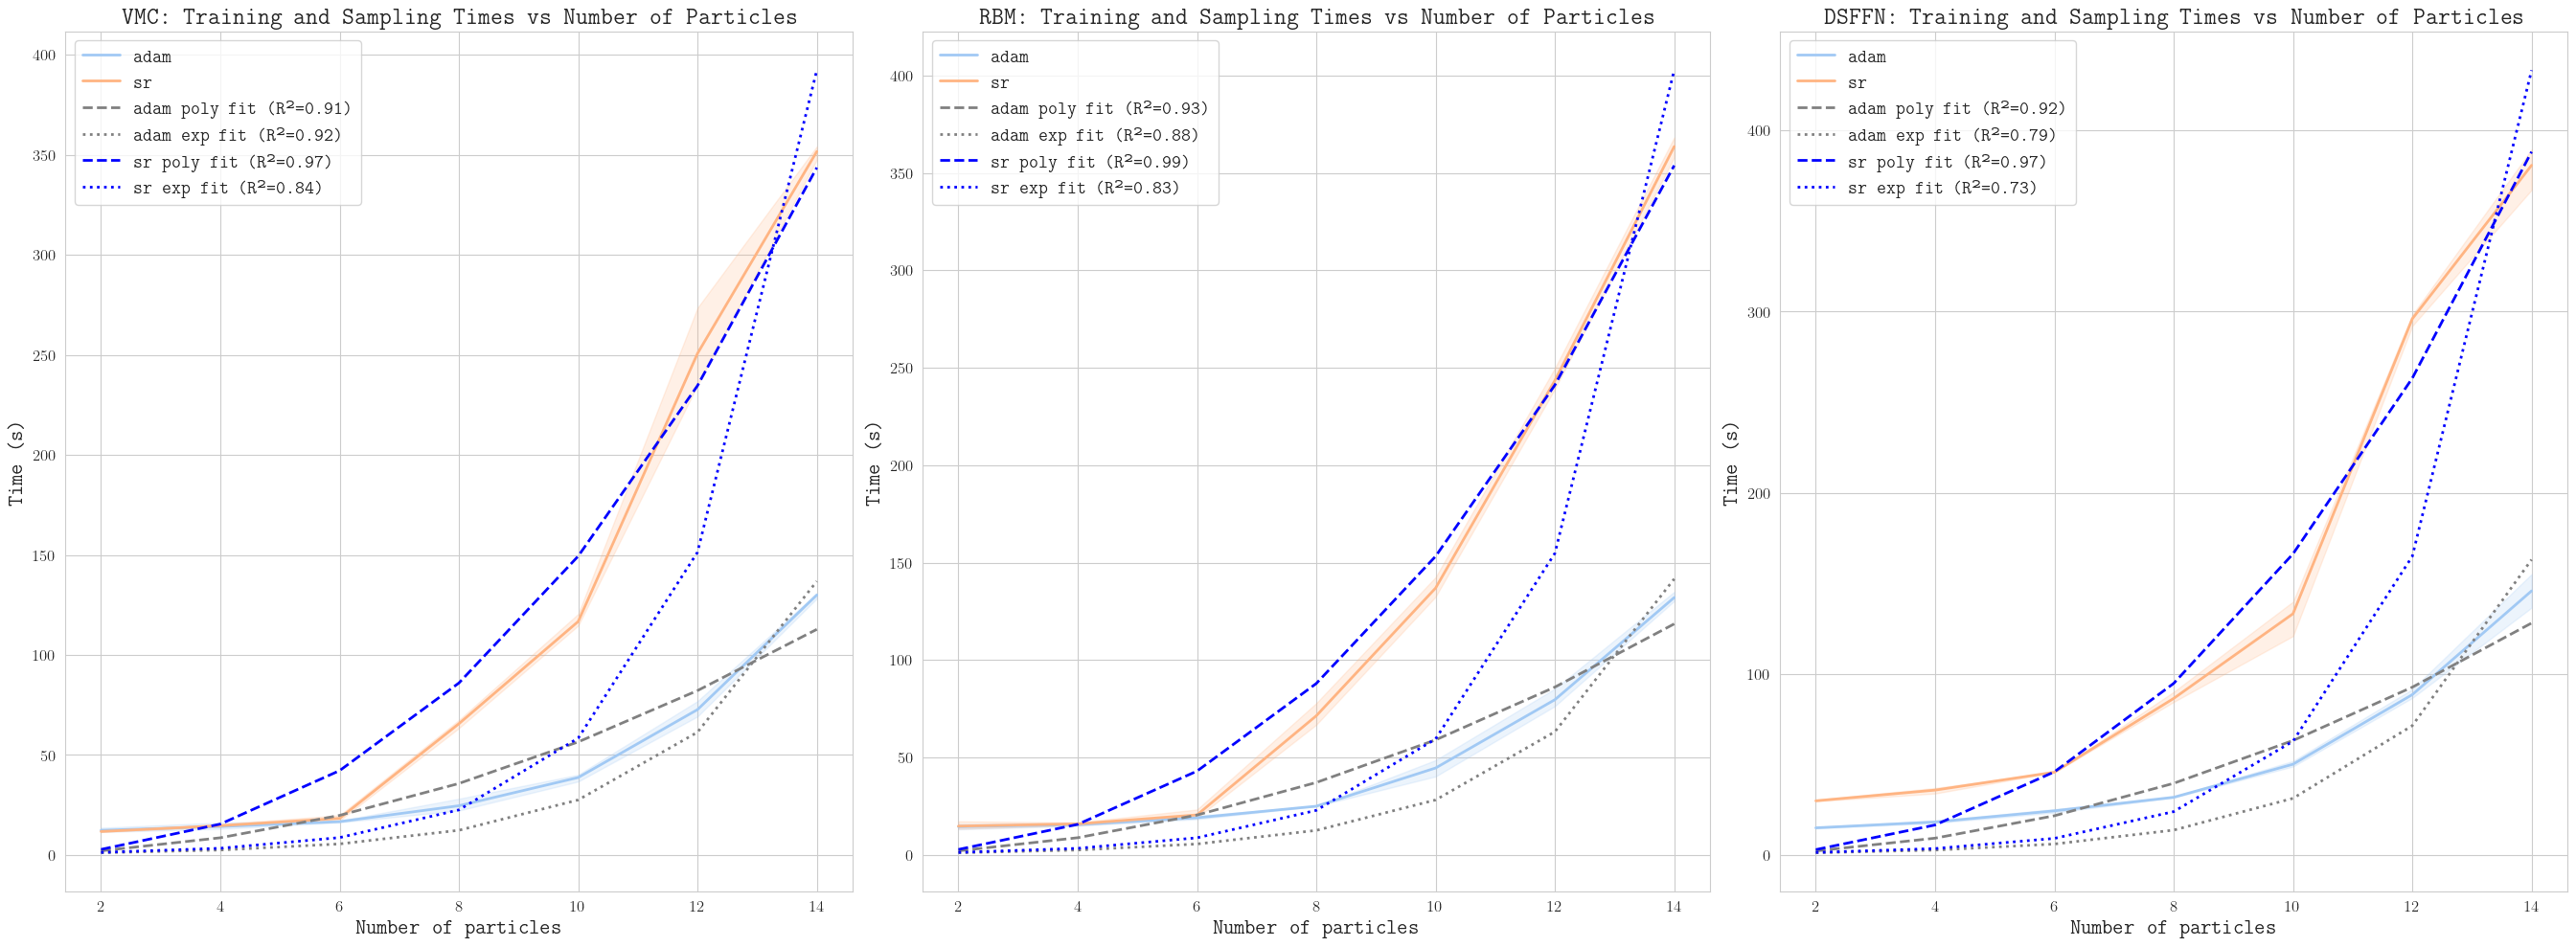

In [30]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


# Paths to data
DATA_PATH = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_polarized/final_results_v0_{v_0}.csv"
data_hf_path = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_polarized/data_hf.csv"
data_ci_path = "/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_polarized/data_ci.csv"

# Combine v_0 =-20, -10, 0, 10, 20 into one dataframe
v_0s = [ 0]
dfs = []
for v_0 in v_0s:
    df = pd.read_csv(DATA_PATH.format(v_0=v_0))
    df["v_0"] = v_0
    dfs.append(df)

# Preprocess data
dfs = [df.dropna(subset=["time_train"]) for df in dfs]
dfs = [df[df["nsamples"] == 1048576] for df in dfs]
dfs = [df.drop(columns=[col for col in df.columns if "time" not in col and "nqs_type" not in col and "n_particles" not in col and "Opti" not in col]) for df in dfs]
dfs = [df.sort_values(by="n_particles") for df in dfs]
dfs = [df[df["n_particles"] != 3] for df in dfs]
print(dfs)
# Combine all dataframes into one
combined_df = pd.concat(dfs)

# Filter the data by nqs_type
df_vmc = combined_df[combined_df["nqs_type"] == "vmc"]
df_rbm = combined_df[combined_df["nqs_type"] == "rbm"]
df_dsffn = combined_df[combined_df["nqs_type"] == "dsffn"]

# Define fitting functions
def poly_fit(x, a, b):
    return a * x**b

def exp_fit(x,a, b):
    return a * np.exp(b * x)

# Function to calculate R²
def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Function to perform fits and plot
def plot_with_fits(ax, df, title):
    sns.lineplot(data=df, x="n_particles", y="time_train", hue="Opti", ax=ax)
    
    opti_types = df["Opti"].unique()
    colors = {"rmsprop": "gray"}
    
    for opti in opti_types:
        data = df[df["Opti"] == opti]
        x = data["n_particles"]
        y = data["time_train"]
        
        popt_poly, _ = curve_fit(poly_fit, x, y)
        # print coefficients
        print(f"{opti} poly fit: a={popt_poly[0]:.2f}, b={popt_poly[1]:.2f}")
        popt_exp, _ = curve_fit(exp_fit, x, y)
        # print coefficients
        print(f"{opti} exp fit: a={popt_exp[0]:.2f}, b={popt_exp[1]:.2f}")
        
        y_pred_poly = poly_fit(x, *popt_poly)
        y_pred_exp = exp_fit(x, *popt_exp)
        
        r2_poly = calculate_r2(y, y_pred_poly)
        print(f"{opti} poly fit R²: {r2_poly:.2f}")
        r2_exp = calculate_r2(y, y_pred_exp)
        print(f"{opti} exp fit R²: {r2_exp:.2f}")
        
        ax.plot(x, y_pred_poly, linestyle="--", color=colors[opti], label=f'{opti} poly fit (R²={r2_poly:.2f})')
        ax.plot(x, y_pred_exp, linestyle=":", color=colors[opti], label=f'{opti} exp fit (R²={r2_exp:.2f})')
        
    ax.set_ylabel("Time (s)")
    ax.set_xlabel("Number of particles")
    ax.set_title(title)
    ax.legend(loc="upper left")

# Plotting the time data with fits
fig, axs = plt.subplots(1, 3, figsize=(27, 10))

# VMC plot
print("vmc")
plot_with_fits(axs[0], df_vmc, "VMC: Training and Sampling Times vs Number of Particles")

# RBM plot
print("rbm")
plot_with_fits(axs[1], df_rbm, "RBM: Training and Sampling Times vs Number of Particles")

# DSFFN plot
print("dsffn")
plot_with_fits(axs[2], df_dsffn, "DSFFN: Training and Sampling Times vs Number of Particles")

plt.tight_layout()
plt.show()


In [135]:

#print complete view even if large

pd.set_option('display.max_rows', None)



# let us get total energy as a function of v_0 for all nqs_types. Let us do that only for N2, n4 and n6 particles

df = df[df["n_particles"].isin([2, 4, 6])]

# Make E value numeric and without (error) in the ty
#df["E"] = df["E"].apply(lambda x: float(x.split("(")[0]))

# write this to a csv   
#df.to_csv("/Users/orpheus/Documents/Masters/NeuralQuantumState/data/fermion_polarized/big_data_all.csv", index=False)

In [136]:

# Make E value numeric and without (error) in the ty
df["E"] = df["E"].apply(lambda x: float(x.split("(")[0]))

Saving figure to /Users/orpheus/Documents/Masters/NeuralQuantumState/analysis/figs/fermion_polarized/total_energy_vs_v0_n2.pdf
Saving figure to /Users/orpheus/Documents/Masters/NeuralQuantumState/analysis/figs/fermion_polarized/total_energy_vs_v0_n4.pdf
Saving figure to /Users/orpheus/Documents/Masters/NeuralQuantumState/analysis/figs/fermion_polarized/total_energy_vs_v0_n6.pdf


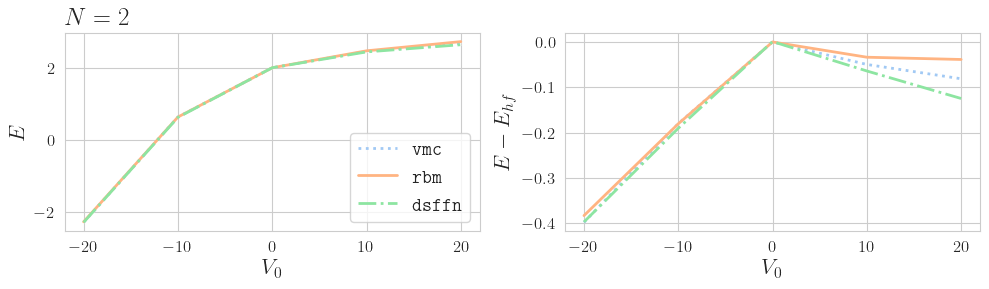

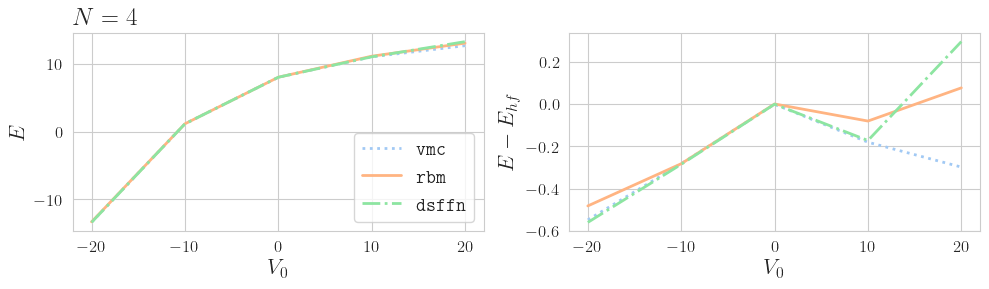

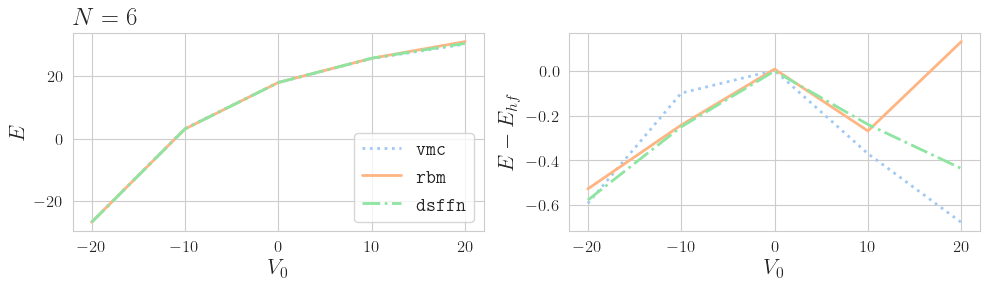

In [137]:



# now make a plot of E vs v_0 for all nqs_types. each line is a nqs_type and there are 3 different plots side by side, then make also e - E_hf
import matplotlib.pyplot as plt



for i, n_particles in enumerate([2, 4, 6]):
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))

    for nqs_type in df["nqs_type"].unique():
        df_nqs = df[(df["nqs_type"] == nqs_type) & (df["n_particles"] == n_particles)]
        # change line style
        if nqs_type == "rbm":
            linestyle = "-"
        elif nqs_type == "vmc":
            linestyle = ":"
        elif nqs_type == "dsffn":
            linestyle = "-."

        axs[0].plot(df_nqs["v_0"], df_nqs["E"], label=nqs_type, linestyle=linestyle)
        # add error as shaded region
        axs[0].fill_between(df_nqs["v_0"], df_nqs["E"] - df_nqs["E_std_error"], df_nqs["E"] + df_nqs["E_std_error"], alpha=0.3)


        axs[1].plot(df_nqs["v_0"], df_nqs["E"] - df_nqs["$E_{hf}$"], label=nqs_type, linestyle=linestyle)


    axs[0].set_ylabel("$E$")

    axs[1].set_ylabel("$E - E_{hf}$")

    axs[0].set_xlabel("$V_0$")
    axs[1].set_xlabel("$V_0$")

    axs[0].set_title(f"$N={n_particles}$", loc="left")
    # add legend
    axs[0].legend()

    plt.tight_layout()

    plot_style.save(f"fermion_polarized/total_energy_vs_v0_n{n_particles}")


In [92]:
# Assuming df is your dataframe and is already loaded
import seaborn as sns
# Convert energy components to numeric
df["$\langle \hat{K}\rangle$"] = df["$\langle \hat{K}\rangle$"].apply(lambda x: float(x.split("(")[0]))
df["$\langle \hat{V}_{trap}\rangle$"] = df["$\langle \hat{V}_{trap}\rangle$"].apply(lambda x: float(x.split("(")[0]))
df["$\langle \hat{V}_{int}\rangle$"] = df["$\langle \hat{V}_{int}\rangle$"].apply(lambda x: float(x.split("(")[0]))

Saving figure to /Users/orpheus/Documents/Masters/NeuralQuantumState/analysis/figs/fermion_polarized/energy_components_vs_v0.pdf


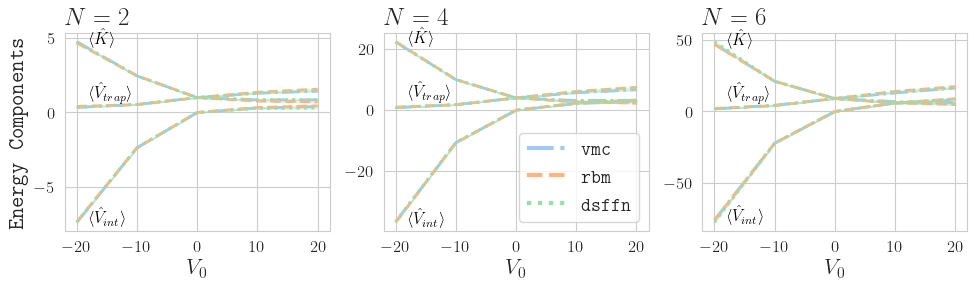

In [127]:

from matplotlib.lines import Line2D

pastel_colors = sns.color_palette("pastel", len(df["nqs_type"].unique()))

n_particles_list = [2, 4, 6]
fig, axs = plt.subplots(1, len(n_particles_list), figsize=(10, 3))

nqs_types = df["nqs_type"].unique()
linestyles = ["-.", "--", ":", ":"]

# Create a dictionary for different line styles for each nqs_type
line_styles_dict = {nqs_type: linestyles[i % len(linestyles)] for i, nqs_type in enumerate(nqs_types)}

for i, n_particles in enumerate(n_particles_list):
    for color, nqs_type in zip(pastel_colors, nqs_types):
        df_nqs = df[(df["nqs_type"] == nqs_type) & (df["n_particles"] == n_particles)]
        linestyle = line_styles_dict[nqs_type]

        # Plot the energy components with linestyle denoting the type of energy
        axs[i].plot(df_nqs["v_0"], df_nqs["$\langle \hat{K}\rangle$"], color=color, label=f"{nqs_type}" if i == 0 else "", linestyle=linestyle)
        axs[i].fill_between(df_nqs["v_0"], df_nqs["$\langle \hat{K}\rangle$"] - df_nqs["K_std_error"], df_nqs["$\langle \hat{K}\rangle$"] + df_nqs["K_std_error"], color=color, alpha=0.3)

        axs[i].plot(df_nqs["v_0"], df_nqs["$\langle \hat{V}_{trap}\rangle$"], color=color, linestyle=linestyle)
        axs[i].fill_between(df_nqs["v_0"], df_nqs["$\langle \hat{V}_{trap}\rangle$"] - df_nqs["PE_trap_std_error"], df_nqs["$\langle \hat{V}_{trap}\rangle$"] + df_nqs["PE_trap_std_error"], color=color, alpha=0.3)

        axs[i].plot(df_nqs["v_0"], df_nqs["$\langle \hat{V}_{int}\rangle$"], color=color, linestyle=linestyle)
        axs[i].fill_between(df_nqs["v_0"], df_nqs["$\langle \hat{V}_{int}\rangle$"] - df_nqs["PE_int_std_error"], df_nqs["$\langle \hat{V}_{int}\rangle$"] + df_nqs["PE_int_std_error"], color=color, alpha=0.3)

        # add a line which is the total energy
        axs[i].plot(df_nqs["v_0"], df_nqs["E"], color=color, linestyle=linestyle)
        axs[i].fill_between(df_nqs["v_0"], df_nqs["E"] - df_nqs["E_std_error"], df_nqs["E"] + df_nqs["E_std_error"], color=color, alpha=0.3)


        # Adding text annotations for interaction types
        if nqs_type == "rbm":
            min_v0 = (df_nqs["v_0"].min()*0.9 ) 
            axs[i].text(min_v0, df_nqs["$\langle \hat{K}\rangle$"].max(), '$\langle \hat{K}\\rangle$', color='black', fontsize=12, ha='left')
            axs[i].text(min_v0, df_nqs["$\langle \hat{V}_{trap}\rangle$"].mean(), '$\langle \hat{V}_{trap}\\rangle$', color='black', fontsize=12, ha='left')
            axs[i].text(min_v0, df_nqs["$\langle \hat{V}_{int}\rangle$"].min(), '$\langle \hat{V}_{int}\\rangle$', color='black', fontsize=12, ha='left')
            axs[i].text(min_v0, df_nqs["E Total"].min(), 'E', color='black', fontsize=12, ha='left')

    axs[i].set_xlabel("$V_0$")
    axs[i].set_title(f"$N={n_particles}$", loc="left")

legend_colors = [Line2D([0], [0], color=color, lw=3, label=nqs_type, linestyle=linestyle) for color, nqs_type, linestyle in zip(pastel_colors, nqs_types, linestyles)]

axs[1].legend(handles=legend_colors, loc='lower right')

axs[0].set_ylabel("Energy")
plt.tight_layout()





plot_style.save(f"fermion_polarized/energy_components_vs_v0")